<a href="https://github.com/hernansalinas/autogrades/tree/main/Evaluaciones/Evaluacion01_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Parcial 01: Metodos computacionales para fisicos 
### Fecha 3/30/23

La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno. 


## 1. (50%). Movimiento de una esfera de radio r en un fluido.

 Una esfera de radio $R$ que asciende o desciende por un fluido puede ser modelada a través de un modelo de partícula, sometida a tres fuerzas: el peso, el empuje y la fuerza rozamiento. Las  ecuaciones de posición (x) y velocidad (v) para un sistema de refencia úbicado en la base del fluido, pueden ser escritas como:

\begin{equation}
x = \frac{G}{\alpha²} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



donde $G=\left( 1-\frac{\rho_f}{\rho} \right)g$, con $\rho_f$, $\rho$ la densidad del fluido y la esfera respectivamente y $g=9.8$ la aceleración de la gravedad y $\alpha$  una constante que depende del radio de la esfera, la viscosidad y la densidad.
$\alpha=\frac{9\eta}{2R^2\rho}$.

Suponga que una esferita de radio $R=2\times10^{-5}m$ es lanzada verticalmente hacia arriba en el agua, con una rapidez de $v_0=0.01$m/s.
Tomando la densidad del agua en  $\rho_f =1000 kg/m^3$,  la densidad de la esfera en $\rho=2670 kg/m^3$ y la viscosidad en $\eta=0.001 kg/ms$.  Determine: 

1. El tiempo total en que la esfera asciende  y desciende. 

2. Determine la rapidez final, con la que llega nuevamente de donde fue lanzada. 



Para ello construya un programa en python que:
- Permita calcular la posición como función del tiempo
- Permita calcular la rapidez como función del tiempo
- Cálcule  el tiempo total de subida y bajada empleando el método de la secante.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc


#Parámetros numericos del problema:
R = 2e-5   # Radio de la esfera, [m]
v0=0.01    # Velocidad inicial, [m/s]
ρf=1000    # Densisdad del agua, [kg/m³]
ρ=2670     # Densisdad de la  esfera, [kg/m³]
η=0.001    # Viscosidada del agua, [kg/((ms)]
g=9.8      # Aceleracion de la gravedad, [m/s²]

#Parámetros  adicionales:

G=1-(ρf/ρ)
α=(9*η)/(2*(R**2)*ρ)



#Funcion de posicion:

def X(t):
  a1=(G/(α**2))*(1+((α*v0)/G))
  a2=1-np.exp(-α*t)
  a3=(G*t)/α

  x=a1*a2-a3
  return x


#Funcion de velocidad:

def V(t):
  b1=(v0 + (G/α))
  b2=np.exp(-α*t)
  b3=G/α

  v=b1*b2 -b3
  return v

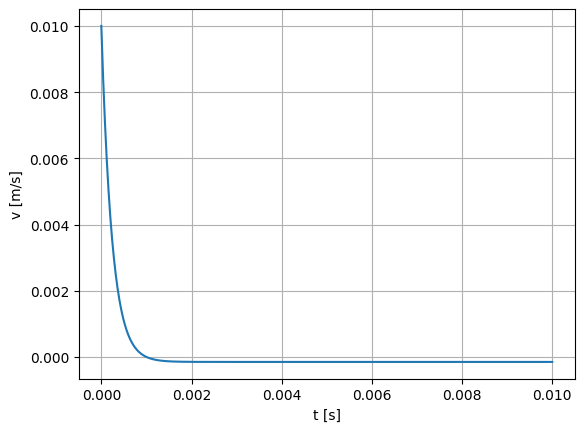

In [30]:
# Tiempo de ascenso: Se obtendrá cuando la velocidad de la partícula se anule, es decir: V(tv)=0; dicha ecuación se resolverá por el método de la secante:
td=np.linspace(0,0.01,1000)


plt.plot(td,V(td))
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.grid()

In [20]:



tp=0.0014                       # Punto de prueba para el metodo de la secante

tv1= sc.optimize.newton(V,tp)

print(f'Tiempo de subida: tv1 = {tv1} s')

Tiempo de subida: tv1 = 0.0010027012834592105 s


In [23]:
# Tiempo de descenso: Para encontrar dicho intervalo de tiempo, evaluaremos el tiempo de subido tv1 en la función de posicion, para conocer la altura inicial desde donde caerá el objeto en cuestión (opcional):

h=X(tv1)
print(f'Altura inicial desde la que cae la bola h = {h}m')

Altura inicial desde la que cae la bola h = 2.2244878990406752e-06m


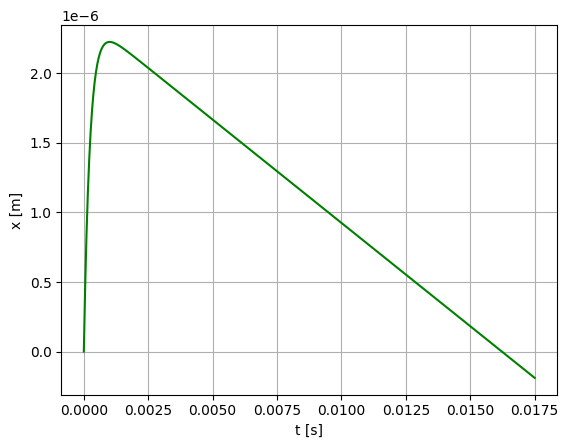

In [32]:
# Ahora planteamos la ecuacion X(tv2)=0 , que nuevamente se resuelve por el metodo de la secante:

td=np.linspace(0,0.0175,1000)
plt.plot(td,X(td),color='green')
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.grid()

In [35]:



tp=0.015 # punto de prueba para el metodo de la secante

tv2=sc.optimize.newton(X,tp)

print(f'Tiempo de bajada: tv2 = {tv2} s')



Tiempo de bajada: tv2 = 0.01622535728542914 s


In [36]:
print(f'Tiempo total de recorrido t ={tv1+tv2} s')

Tiempo total de recorrido t =0.01722805856888835 s


In [37]:
# Por otra parte, la velocidad final con la cual llegará la partícula al punto inicial de donde fue lanzada será V(tv2):

vf= V(tv2)
print(f'Rapidez final: vf = {vf} m/s')

Rapidez final: vf = -0.00014844444444444443 m/s


## 2. (50%). Interpolación
Para los siguientes datos de temperatura media como función del tiempo de los últimos años de  Bogotá y Barcelona ([Temperature_Bogota_Barcelona](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)). Aplique el método de  hermite y spline cúbicos. Para ello realice lo siguiente:

1. Leer el dataset desde la url, con el comando pd.read_csv.
2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$
3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
4. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 


Ayuda :

| Comando | Descripción |
| --- | --- |
| pd.read_csv() | Lee un archivo CSV y lo convierte en un DataFrame de Pandas |
| pd.read_excel() | Lee un archivo de Excel y lo convierte en un DataFrame de Pandas |
| pd.read_json() | Lee un archivo JSON y lo convierte en un DataFrame de Pandas |
| df.head() | Muestra las primeras filas del DataFrame |
| df.tail() | Muestra las últimas filas del DataFrame |
| df.info() | Muestra información sobre el DataFrame |
| df.describe() | Muestra estadísticas descriptivas del DataFrame |
| df.dropna() | Elimina filas con valores faltantes |
| df.drop_duplicates() | Elimina filas duplicadas |
| df.groupby() | Agrupa el DataFrame por una o más columnas |
| df.sort_values() | Ordena el DataFrame por una o más columnas |
| df.to_csv() | Guarda el DataFrame como un archivo CSV |
| df.loc[condicion] | Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones |
| df[df["columna"]== x] | Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable |


Referencias: 

- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes_1/stokes_1.html
- Lindemuth J. The effect of air resistance on falling balls. Am. J. Phys. 39, July 1971, pp. 757-759


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

url='https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv'

df=pd.read_csv(url)
df

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329
5,5,1997,Bogota,6.526027,15.720548,56.231507
6,6,1998,Barcelona,6.526027,15.720548,60.273973
7,7,1998,Bogota,6.526027,15.720548,49.642466
8,8,1999,Barcelona,6.526027,15.720548,61.204658
9,9,1999,Bogota,6.526027,15.720548,52.231781


In [60]:

df["AvgTempCelcius"]=(df.AvgTemperature-32)/1.8

df

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321,16.677321
1,1,1995,Bogota,6.526027,15.720548,54.963014,12.757230,12.757230
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087,16.181087
3,3,1996,Bogota,6.513661,15.756831,55.083333,12.824074,12.824074
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849,17.006849
5,5,1997,Bogota,6.526027,15.720548,56.231507,13.461948,13.461948
6,6,1998,Barcelona,6.526027,15.720548,60.273973,15.707763,15.707763
7,7,1998,Bogota,6.526027,15.720548,49.642466,9.801370,9.801370
8,8,1999,Barcelona,6.526027,15.720548,61.204658,16.224810,16.224810
9,9,1999,Bogota,6.526027,15.720548,52.231781,11.239878,11.239878


In [100]:
dfbogota=df.copy()
dfbarcelona=df.copy()


dfbogota = df[df["City"]== 'Bogota']
dfbarcelona = df[df["City"]== 'Barcelona']	


dfbogota
dfbarcelona

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321,16.677321
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087,16.181087
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849,17.006849
6,6,1998,Barcelona,6.526027,15.720548,60.273973,15.707763,15.707763
8,8,1999,Barcelona,6.526027,15.720548,61.204658,16.224810,16.224810
10,10,2000,Barcelona,6.513661,15.756831,60.069399,15.594111,15.594111
12,12,2001,Barcelona,6.526027,15.720548,59.279452,15.155251,15.155251
14,14,2002,Barcelona,6.526027,15.720548,58.044110,14.468950,14.468950
16,16,2003,Barcelona,6.526027,15.720548,63.139452,17.299696,17.299696
18,18,2004,Barcelona,6.513661,15.756831,62.875137,17.152854,17.152854


Text(0, 0.5, 'AvgTempCelcius')

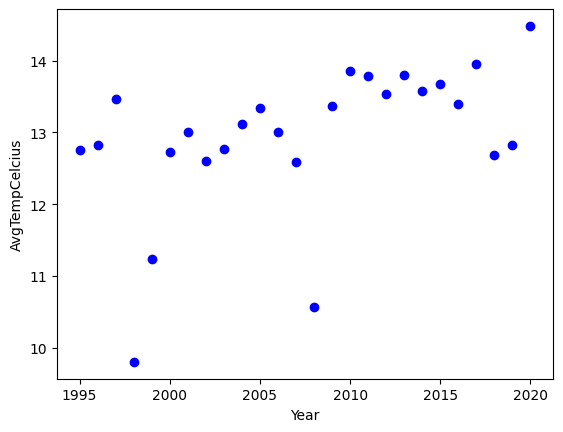

In [101]:
# Temperatura promedio en grados celcius de Bogota como funcion del año:
xa = dfbogota.Year
ya = dfbogota.AvgTempCelcius

plt.plot(xa,ya,'bo')
plt.xlabel('Year')
plt.ylabel('AvgTempCelcius')

Text(0, 0.5, 'AvgTempCelcius')

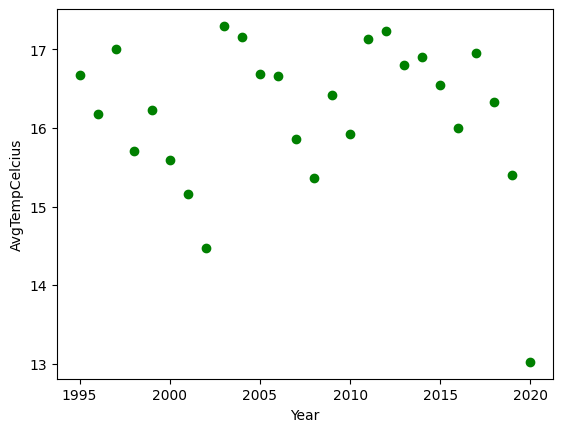

In [102]:
# Temperatura promedio en grados celcius de Barcelona como funcion del año:
xb = dfbarcelona.Year
yb = dfbarcelona.AvgTempCelcius

plt.plot(xb,yb,'go')
plt.xlabel('Year')
plt.ylabel('AvgTempCelcius')

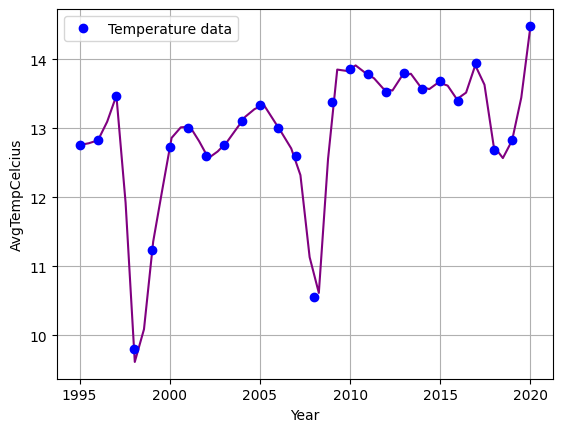

In [98]:




# Interpolacion de Hermite para los datos de Bogota:

xa = dfbogota.Year
ya = dfbogota.AvgTempCelcius



dydx=np.diff(ya)

dya=np.insert(dydx,0,0.0)
dya

H= sc.interpolate.CubicHermiteSpline(xa,ya,dya)



#dominio del polinomio interpolador de hermite:

xx=np.linspace(xa.min(),xa.max())


plt.plot(xx,H(xx),color='purple')
plt.plot(xa,ya,'bo',label='Temperature data')
plt.xlabel('Year')
plt.ylabel('AvgTempCelcius')
plt.legend()
plt.grid()

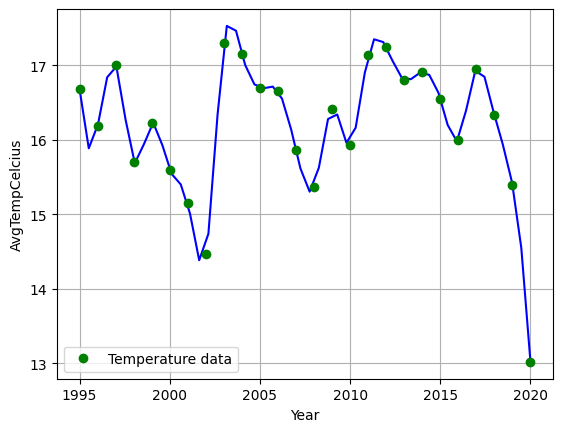

In [99]:




# Interpolacion de Spline cubicos para los datos de Barcelona:

xb = dfbarcelona.Year
yb = dfbarcelona.AvgTempCelcius


"""
plt.plot(xb,yb,'go')
plt.xlabel('Year')
plt.ylabel('AvgTempCelcius')
"""

Ps=sc.interpolate.CubicSpline(xb,yb)

#dominio del polinomio cubico de splines interpolador :

x2=np.linspace(xb.min(),xb.max())



plt.plot(x2,Ps(x2),color='blue')
plt.plot(xb,yb,'go',label='Temperature data')
plt.xlabel('Year')
plt.ylabel('AvgTempCelcius')
plt.legend()
plt.grid()